1. Dog()
2. 

In [42]:
%matplotlib inline

import sys
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage

import blob

/Users/Kepler/anaconda/envs/nd36/lib/python3.6/site-packages/tifffile/tifffile.py:306: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


In [34]:
# loading tiff stack
stack_0 = sitk.ReadImage('../../../sample_data/cell_detection_0.tiff')
stack_0 = sitk.GetArrayFromImage(stack_0)
img_0 = stack_0 * np.float64(255.0 / stack_0.max())
# img_0 = stack_0 * np.uint16(255 / stack_0.max())
print('shape:', stack_0.shape)

shape: (100, 500, 500)


In [35]:
print(img_0.max())

255.0


In [39]:
blobs = blob.findBlobs(stack_0, scales=range(20, 25), threshold=10)
print(blobs)

[]


TypeError: Invalid dimensions for image data

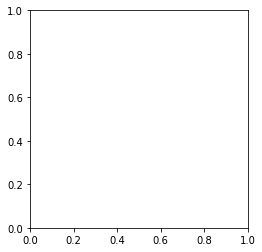

In [7]:
fig, ax = plt.subplots(1, 1)
ax.imshow(stack_0, cmap='gray')
ax.scatter(*blobs.T[1:][::-1], s=blobs.T[0] * 10, edgecolor='red', facecolor='none')
fig.tight_layout()
plt.show()

In [43]:
from tifffile import imread

In [44]:
data = imread('hubble_deep_field.tif').astype('float32').sum(axis=-1)

In [45]:
# Equivalent to `blobs --size 5 10 --threshold 10 hubble_deep_field.tif`
blobs = blob.findBlobs(data, scales=range(5, 10), threshold=10)

In [47]:
print(blobs)

[[  5   0 152]
 [  5   0 184]
 [  5   0 489]
 ..., 
 [  9 109 291]
 [  9 402 123]
 [  9 473 727]]


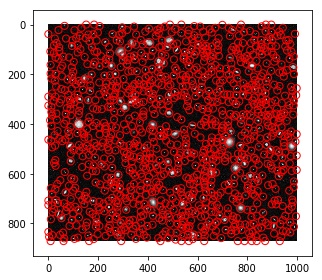

In [46]:
fig, ax = plt.subplots(1, 1)
ax.imshow(data, cmap='gray')
ax.scatter(*blobs.T[1:][::-1], s=blobs.T[0] * 10, edgecolor='red', facecolor='none')
fig.tight_layout()
plt.show()